In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from graph_dynamics.dynamics import Macrostates
from graph_dynamics.dynamics import GenerativeDynamics
from graph_dynamics.utils import graph_paths_visualization
from graph_dynamics.dynamics import GraphsFormatsHandlers
from graph_dynamics.networks.datatypes import VanillaGraph

from graph_dynamics.dynamics import MacrostatesHandlers
from graph_dynamics.dynamics import Macrostates
from graph_dynamics.utils import gd_files_handler
from graph_dynamics.embeddings import alignment

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GT 720 (CNMeM is disabled, cuDNN not available)


In [3]:
from scipy.linalg import orthogonal_procrustes
from scipy.spatial import procrustes

In [4]:
Macrostates.macrostate_function_dictionary.keys()

['degree_distribution',
 'basic_stats',
 'pagerank',
 'new_nodes',
 'bigclam',
 'node2vec_macrostates']

In [29]:
initial_graph = nx.barabasi_albert_graph(20,3)
number_of_steps = 30

BurnExpFireP = False
StartNNodes = 1
ForwBurnProb = 0.2
BackBurnProb = 0.32
DecayProb = 1.0
Take2AmbasPrb =  0.
OrphanPrb =  0.

forestFireParameters = (BurnExpFireP,StartNNodes,ForwBurnProb,BackBurnProb,DecayProb,Take2AmbasPrb,OrphanPrb) 
timeSeriesOfNodes = np.ones(number_of_steps)*10
number_of_steps_in_memory = 5

nargs = {"dimensions":2,
         "directed":False,
         "p":0.001,
         "q":2,
         "num_walks":10,
         "walk_length":80,
         "window_size":10,
         "workers":8,
         "iter":1,
         "weighted":False,
         "undirected":True}
    
gd_directory = "/home/cesar/Desktop/Doctorado/Projects/Networks/Dynamics/Simulations/"

#gd_directory = "/home/cesar/Desktop/Simulations/"
DYNAMICS_PARAMETERS = {"number_of_steps":number_of_steps,
                        "number_of_steps_in_memory":number_of_steps_in_memory,
                        "simulations_directory":gd_directory,
                        "dynamics_identifier":"ForestFireEmbeddings2",
                        "macrostates":[("node2vec_macrostates",(nargs,))],
                        "graph_class":"VanillaGraph",
                        "datetime_timeseries":False,
                        "initial_date":1,
                        "verbose":True}

vanilla_graph = VanillaGraph("Vanilla", 
                             graph_state={"None":None}, 
                             networkx_graph=initial_graph)

# Dynamics

In [30]:

ForestFireDynamics = GenerativeDynamics.ForestFire(vanilla_graph, 
                                                   forestFireParameters,
                                                   timeSeriesOfNodes,
                                                   DYNAMICS_PARAMETERS)        
ForestFireDynamics.evolve(30, vanilla_graph)
graph_paths = ForestFireDynamics.get_graph_path_window(0, 20)


Dynamics Directory Exists
#30 STEPS EVOLUTION STARTED FOR ForestFireEmbeddings2
#STARTING EVOLUTION AT STEP 9
110
initital generate paths  110
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
All graph in memory
120
130
140
150
160
last guy
160
initital generate paths  160
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10


In [62]:
gd_directory = "/home/cesar/Desktop/Doctorado/Projects/Networks/Dynamics/Simulations/CommunityForestFire_gd/"
ALL_TIME_INDEXES,DYNAMICS_PARAMETERS,macroNumbers = gd_files_handler.gd_folder_stats(gd_directory,True)

Dynamics CommunityForestFire
{u'DynamicsClassParameters': {u'CommunitiesForestFire': {u'0': {u'BackBurnProb': 0.32,
                                                                u'BurnExpFireP': False,
                                                                u'DecayProb': 1.0,
                                                                u'ForwBurnProb': 0.2,
                                                                u'OrphanPrb': 0.0,
                                                                u'StartNNodes': 1,
                                                                u'Take2AmbasPrb': 0.0},
                                                         u'1': {u'BackBurnProb': 0.32,
                                                                u'BurnExpFireP': False,
                                                                u'DecayProb': 1.0,
                                                                u'ForwBurnProb': 0.2,
                             

In [61]:

nargs = {"dimensions":2,
         "directed":False,
         "p":0.001,
         "q":2,
         "num_walks":10,
         "walk_length":80,
         "window_size":10,
         "workers":8,
         "iter":1,
         "weighted":False,
         "undirected":True}
    
macrostates_run_ideintifier = "node2vec" 
macrostates_names  = [("node2vec_macrostates",(nargs,))]
window = 1
rolling = True
Macrostates.evaluate_vanilla_macrostates_window(gd_directory,
                                                [("new_nodes",())], 
                                                "newnodes", 
                                                window, 
                                                rolling)
                                                
#Macrostates.evaluate_vanilla_macrostates(gd_directory, 
#                                         macrostates_names, 
#                                         macrostates_run_ideintifier)

Evaluating Time 1 for newnodes
Evaluating Time 2 for newnodes
Evaluating Time 3 for newnodes
Evaluating Time 4 for newnodes
Evaluating Time 5 for newnodes
Evaluating Time 6 for newnodes
Evaluating Time 7 for newnodes
Evaluating Time 8 for newnodes
Evaluating Time 9 for newnodes
Evaluating Time 10 for newnodes
Evaluating Time 11 for newnodes
Evaluating Time 12 for newnodes
Evaluating Time 13 for newnodes
Evaluating Time 14 for newnodes
Evaluating Time 15 for newnodes
Evaluating Time 16 for newnodes
Evaluating Time 17 for newnodes
Evaluating Time 18 for newnodes
Evaluating Time 19 for newnodes
Evaluating Time 20 for newnodes
Evaluating Time 21 for newnodes
Evaluating Time 22 for newnodes
Evaluating Time 23 for newnodes
Evaluating Time 24 for newnodes
Evaluating Time 25 for newnodes
Evaluating Time 26 for newnodes
Evaluating Time 27 for newnodes
Evaluating Time 28 for newnodes
Evaluating Time 29 for newnodes
Evaluating Time 30 for newnodes
Evaluating Time 31 for newnodes
Evaluating Time 3

# Initial and New Nodes Ordering

In [63]:
macro_state_identifier = 'node2vec_macrostates'
macrostate_file_indentifier = 'node2vec'

time_index = 0
initial_embeddings = MacrostatesHandlers.time_index_macro(gd_directory,
                                                          macro_state_identifier,
                                                          macrostate_file_indentifier,
                                                          time_index)
initial_nodes = initial_embeddings.keys()
initial_nodes.sort()

In [6]:
new_nodes_per_time = alignment.all_new_nodes_per_time(gd_directory,initial_nodes,latest_index=50)

NameError: name 'gd_directory' is not defined

# ALIGNMENT 

In [5]:
w_base, w_other = alignment.embedings_in_order(new_nodes_per_time,
                                     0,
                                     49,
                                     gd_directory,
                                     macrostate_file_indentifier)

w_base, w_other_2 = alignment.embedings_in_order(new_nodes_per_time,
                                     0,
                                     5,
                                     gd_directory,
                                     macrostate_file_indentifier)

NameError: name 'new_nodes_per_time' is not defined

In [95]:
base_embed, w_other = alignment.procrustes_align(w_base,w_other)
base_embed, w_other_2 = alignment.procrustes_align(w_base,w_other_2)

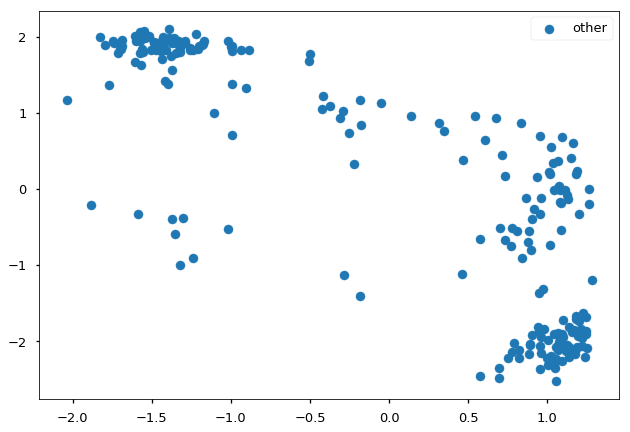

In [97]:
plt.scatter(w_other[:,0], w_other[:,1],label="{0}".format("other"))
#plt.scatter(w_other_2[:,0], w_other_2[:,1],label="{0}".format("other 2"))
#plt.scatter(base_embed[:,0], base_embed[:,1],label="{0}".format("base"))
plt.legend(loc="best")
plt.show()

In [31]:
W = []
for time_index in range(1,10):
    node_embeddings = MacrostatesHandlers.time_index_macro(gd_directory,
                                                           macro_state_identifier,
                                                           macrostate_file_indentifier,
                                                           time_index)
    wt = []
    for node in initial_nodes:
        wt.append(np.array(node_embeddings[node]))
    wt = np.array(wt)
    W.append(wt)

In [45]:
Align_W = []
for w in W:
    Align_W.append(alignment.procrustes_align(w0,w)[1])

In [46]:
for t,w in enumerate(Align_W):
    plt.scatter(w[:,0], w[:,1],label="{0}".format(t))
plt.legend(loc="best")

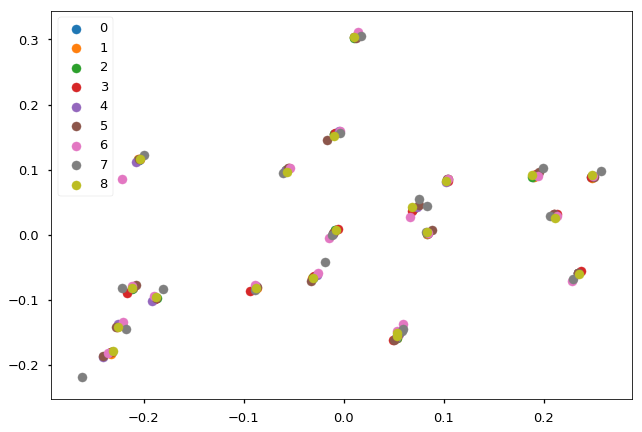

In [47]:
plt.show()